# Predicción de Precios de Gasolina Superior con LSTM

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

## Cargando y Preparando los Datos

In [2]:
file_path = "precios.csv"
data = pd.read_csv(file_path)

prices = data['Superior'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

sequence_length = 10
X, y = [], []
for i in range(len(prices_scaled) - sequence_length):
    X.append(prices_scaled[i:i+sequence_length])
    y.append(prices_scaled[i+sequence_length])
X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


## Construyendo y Entrenando el Primer Modelo LSTM

In [3]:
model1 = Sequential()
model1.add(LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=True))
model1.add(LSTM(50, return_sequences=False))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mean_squared_error')
history_model1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
24/24 [==============================] - 5s 48ms/step - loss: 0.0438 - val_loss: 0.0099
Epoch 2/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0045 - val_loss: 0.0029
Epoch 3/50
24/24 [==============================] - 0s 12ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 4/50
24/24 [==============================] - 0s 12ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 8/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 9/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 10/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 11/

## Construyendo y Entrenando el Segundo Modelo LSTM

In [4]:
model2 = Sequential()
model2.add(LSTM(100, input_shape=(X_train.shape[1], 1), return_sequences=False))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mean_squared_error')
history_model2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
24/24 [==============================] - 3s 30ms/step - loss: 0.0361 - val_loss: 0.0071
Epoch 2/50
24/24 [==============================] - 0s 10ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 3/50
24/24 [==============================] - 0s 10ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 4/50
24/24 [==============================] - 0s 9ms/step - loss: 0.0010 - val_loss: 9.7658e-04
Epoch 5/50
24/24 [==============================] - 0s 9ms/step - loss: 9.8835e-04 - val_loss: 0.0011
Epoch 6/50
24/24 [==============================] - 0s 11ms/step - loss: 0.0010 - val_loss: 9.0886e-04
Epoch 7/50
24/24 [==============================] - 0s 10ms/step - loss: 9.8442e-04 - val_loss: 8.9376e-04
Epoch 8/50
24/24 [==============================] - 0s 10ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 9/50
24/24 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 8.7559e-04
Epoch 10/50
24/24 [==============================] - 0s 11ms/step - loss: 9.8529e-04 - v

## Comparando los Modelos

6/6 [==============================] - 0s 5ms/step - loss: 8.0167e-04


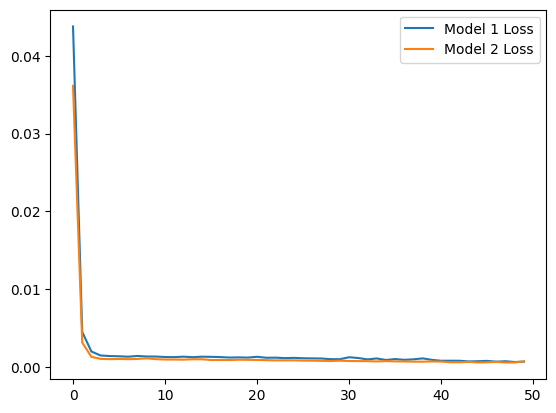

Loss for Model 1 on Test Data: 0.00044966783025301993
Loss for Model 2 on Test Data: 0.0008016673964448273


In [5]:

loss_model1 = model1.evaluate(X_test, y_test)
loss_model2 = model2.evaluate(X_test, y_test)

plt.plot(history_model1.history['loss'], label='Model 1 Loss')
plt.plot(history_model2.history['loss'], label='Model 2 Loss')
plt.legend()
plt.show()

print(f"Loss for Model 1 on Test Data: {loss_model1}")
print(f"Loss for Model 2 on Test Data: {loss_model2}")

## Visualizando las Predicciones


6/6 [==============================] - 1s 3ms/step


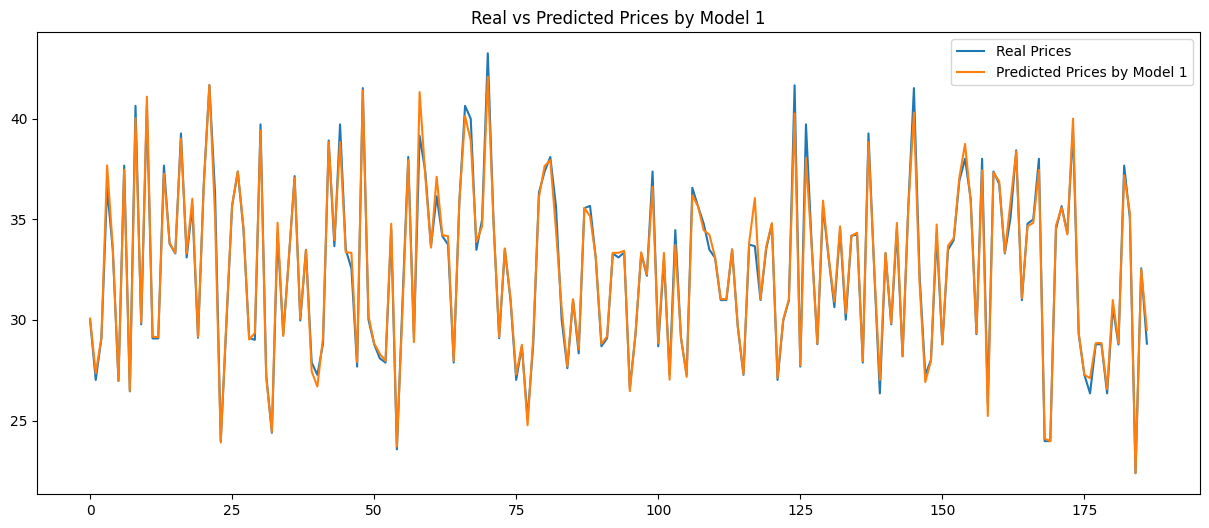

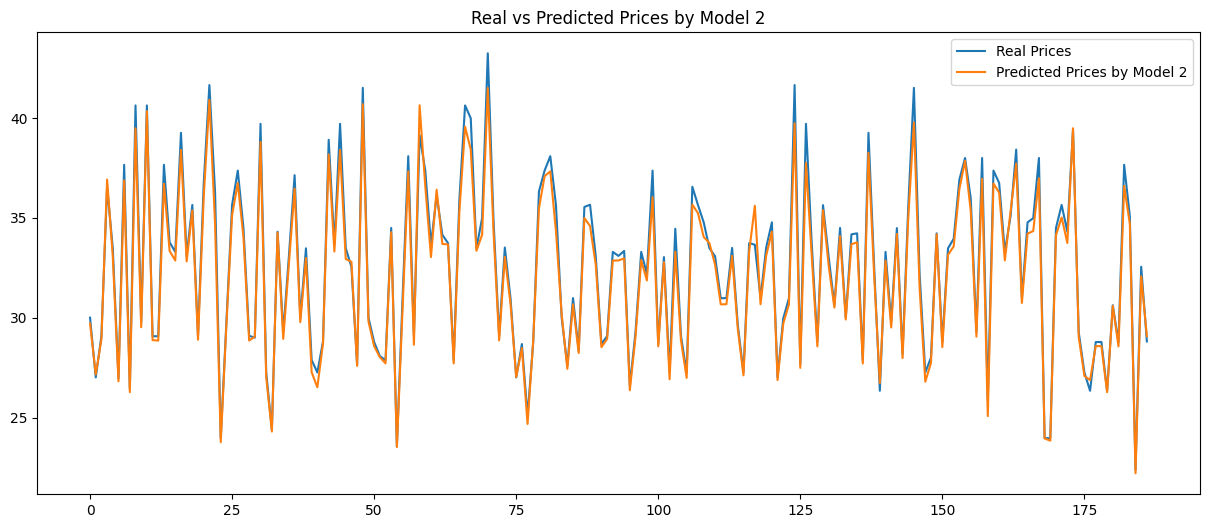

In [6]:

predictions_model1 = model1.predict(X_test)
predictions_model2 = model2.predict(X_test)

predictions_model1 = scaler.inverse_transform(predictions_model1)
predictions_model2 = scaler.inverse_transform(predictions_model2)
y_test_original = scaler.inverse_transform(y_test)

plt.figure(figsize=(15, 6))
plt.plot(y_test_original, label='Real Prices')
plt.plot(predictions_model1, label='Predicted Prices by Model 1')
plt.title('Real vs Predicted Prices by Model 1')
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(y_test_original, label='Real Prices')
plt.plot(predictions_model2, label='Predicted Prices by Model 2')
plt.title('Real vs Predicted Prices by Model 2')
plt.legend()
plt.show()


1/1 [==============================] - 0s 20ms/step


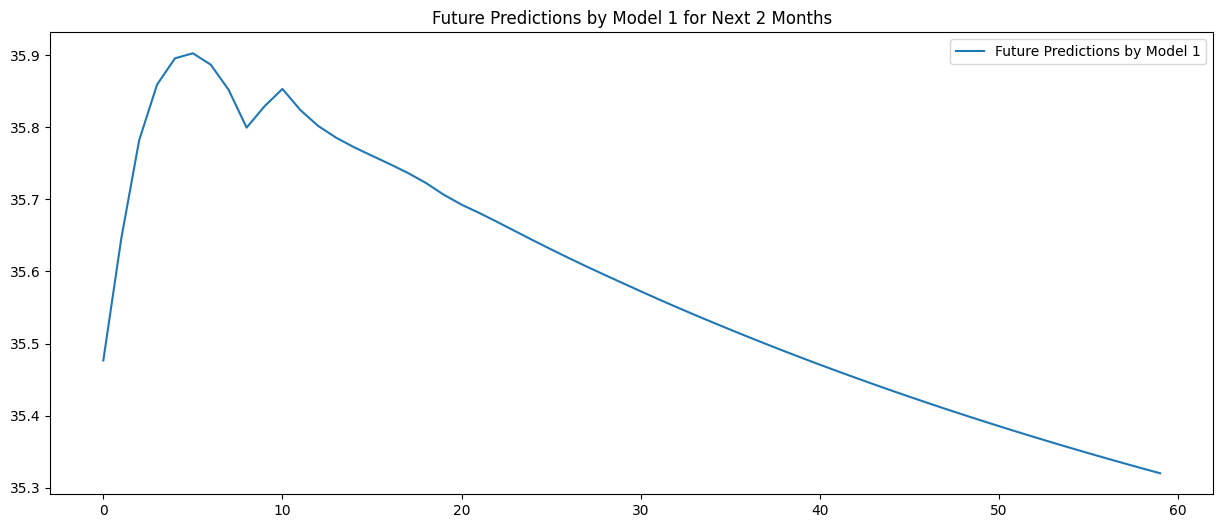

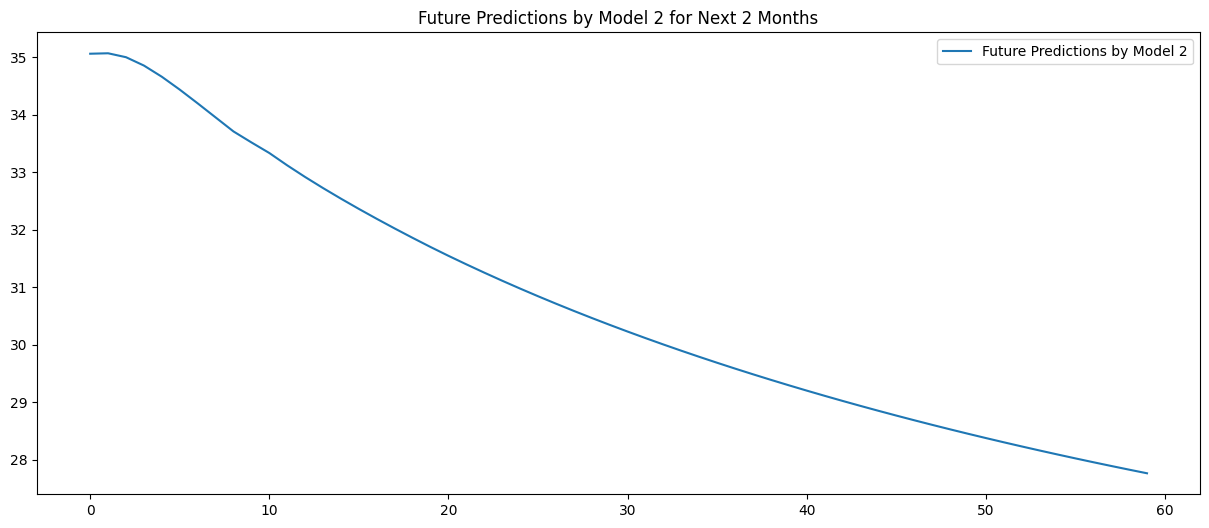

In [7]:

def predict_future_prices(model, last_sequence, future_steps):
    future_predictions = []
    current_sequence = last_sequence.copy()
    for i in range(future_steps):
        prediction = model.predict(current_sequence.reshape(1, current_sequence.shape[0], 1))
        future_predictions.append(prediction[0][0])
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = prediction
    return scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

future_steps = 60

last_sequence = X[-1]
future_predictions_model1 = predict_future_prices(model1, last_sequence, future_steps)
future_predictions_model2 = predict_future_prices(model2, last_sequence, future_steps)

plt.figure(figsize=(15, 6))
plt.plot(future_predictions_model1, label='Future Predictions by Model 1')
plt.title('Future Predictions by Model 1 for Next 2 Months')
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(future_predictions_model2, label='Future Predictions by Model 2')
plt.title('Future Predictions by Model 2 for Next 2 Months')
plt.legend()
plt.show()


## Comparacion
Al analizar los datos con el precio real el dia de hoy de la gasolina podemos observar que el modelo 1 tiene una prediccion mucho mas adecuada a la realidad se podria decir que exactamente lo que esta ocurriendo, ya que segun el mineisterio de energia y minas (MEM) el precio es de 35.97 lo cual caza con la prediccion del modelo 1, mientras que el modelo 2 tiene una prediccion de 33.25 lo cual es un poco mas bajo que el precio real.

Asimismo observamos una perdida de 0.0004 en el modelo 1 y de 0.0008 en el modelo 2, lo cual nos indica que el modelo 1 es mas preciso que el modelo 2.

